In [1]:
# Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

In [2]:
df = pd.read_csv("C:/Users/USUARIO/OneDrive/Desktop/Análisis de Datos/Módulo Técnico/dataset_banco.csv")

In [3]:
data_rename = df.rename(columns={"age": "edad",
                                 "job": "trabajo",
                                 "marital": "estado_civil",
                                 "education": "educacion",
                                 "default": "morosidad",
                                 "balance": "saldo",
                                 "housing": "vivienda",
                                 "loan": "prestamo",
                                 "contact": "contacto",
                                 "day": "dia",
                                 "month": "mes",
                                 "duration": "duracion",
                                 "campaign": "campana",
                                 "pdays": "dias_previos",
                                 "previous": "anterior",
                                 "poutcome": "resultado",
                                 "y": "resultado"}) 

print(data_rename.head(50))

    edad        trabajo estado_civil  educacion morosidad    saldo vivienda  \
0     58     management      married   tertiary        no   2143.0      yes   
1     44     technician       single  secondary        no     29.0      yes   
2     33   entrepreneur      married  secondary        no      2.0      yes   
3     47    blue-collar      married    unknown        no   1506.0      yes   
4     33        unknown       single    unknown        no      1.0       no   
5     35     management      married   tertiary        no    231.0      yes   
6     28     Management       single   tertiary        no    447.0      yes   
7     42   entrepreneur         div.   tertiary       yes      2.0      yes   
8     58        retired      married    primary        no    121.0      yes   
9     43     technician       single  secondary        no    593.0      yes   
10    41         admin.         div.  secondary        no    270.0      yes   
11    29         admin.       single  secondary     

In [4]:
df.columns = ["edad",
             "trabajo",
             "estado_civil",
             "educacion",
             "incumplimiento",
             "saldo",
             "vivienda",
             "prestamo",
             "contacto",
             "dia",
             "mes",
             "duracion",
             "campaña",
             "dias_previos",
             "anterior",
             "resultado_prev",
             "respuesta"]

print(df.columns)

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            45215 non-null  int64  
 1   trabajo         45213 non-null  object 
 2   estado_civil    45214 non-null  object 
 3   educacion       45214 non-null  object 
 4   incumplimiento  45215 non-null  object 
 5   saldo           45213 non-null  float64
 6   vivienda        45215 non-null  object 
 7   prestamo        45215 non-null  object 
 8   contacto        45215 non-null  object 
 9   dia             45215 non-null  int64  
 10  mes             45215 non-null  object 
 11  duracion        45214 non-null  float64
 12  campaña         45215 non-null  int64  
 13  dias_previos    45214 non-null  float64
 14  anterior        45215 non-null  int64  
 15  resultado_prev  45215 non-null  object 
 16  respuesta       45215 non-null  object 
dtypes: float64(3), int64(4), object

In [6]:
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']
Columnas numéricas: ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']


In [7]:
pd.value_counts(df["trabajo"])



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17476\3888142606.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["trabajo"])


trabajo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

In [8]:
# Contar los valores faltantes del dataframe

df.isna().sum()


edad              0
trabajo           2
estado_civil      1
educacion         1
incumplimiento    0
saldo             2
vivienda          0
prestamo          0
contacto          0
dia               0
mes               0
duracion          1
campaña           0
dias_previos      1
anterior          0
resultado_prev    0
respuesta         0
dtype: int64

In [9]:
# eliminar los valores faltantes del dataframe
df.dropna(inplace=True)
# conteo de valores por columna del dataframe
df.count()

edad              45207
trabajo           45207
estado_civil      45207
educacion         45207
incumplimiento    45207
saldo             45207
vivienda          45207
prestamo          45207
contacto          45207
dia               45207
mes               45207
duracion          45207
campaña           45207
dias_previos      45207
anterior          45207
resultado_prev    45207
respuesta         45207
dtype: int64

In [10]:
cols_cat = ["trabajo", "estado_civil", "educacion", "incumplimiento", "vivienda", "prestamo", "contacto", "mes", "resultado_prev", "respuesta"]

for col in cols_cat:
    print(f"Columna {col}: {df[col].nunique()} subniveles")

Columna trabajo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna educacion: 10 subniveles
Columna incumplimiento: 2 subniveles
Columna vivienda: 2 subniveles
Columna prestamo: 6 subniveles
Columna contacto: 5 subniveles
Columna mes: 12 subniveles
Columna resultado_prev: 6 subniveles
Columna respuesta: 2 subniveles


In [11]:
pd.value_counts(df["trabajo"])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17476\3096400181.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["trabajo"])


trabajo
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

In [12]:
for col in cols_cat:
    print(f"\nConteo de registros por subnivel para la variable '{col}':")
    print(df[col].value_counts())


Conteo de registros por subnivel para la variable 'trabajo':
trabajo
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

Conteo de registros por subnivel para la variable 'estado_civil':
estado_civil
married     27211
single      12786
divorced     5196
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64

Conteo de registros por subnivel para la variable 'educacion':
educacion
secondary    23192
tertiary     13301
primary       6848
unknown       1855
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count,

In [13]:
desviaciones_estandar = df[["edad", "saldo", "dia", "duracion", "campaña", "dias_previos", "anterior"]].std()
print(desviaciones_estandar)

edad              12.037399
saldo           3924.491665
dia                8.323015
duracion         257.460759
campaña            3.098058
dias_previos     100.103283
anterior           2.303341
dtype: float64


In [14]:
destd_pdays = df[["dias_previos"]].std()
print(destd_pdays)

dias_previos    100.103283
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

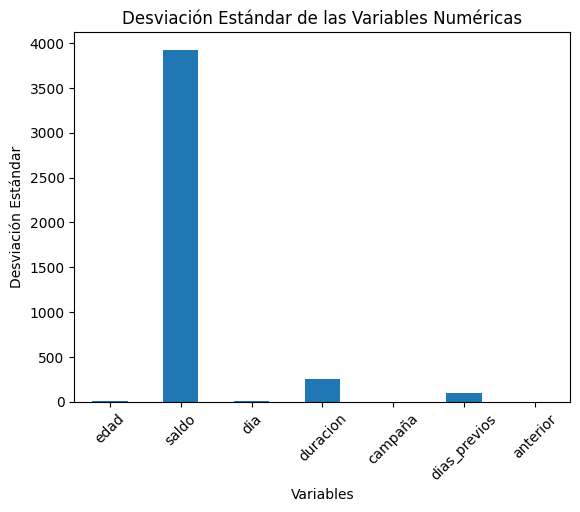

In [15]:
desviaciones_estandar.plot(kind="bar")
plt.title("Desviación Estándar de las Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Desviación Estándar")
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

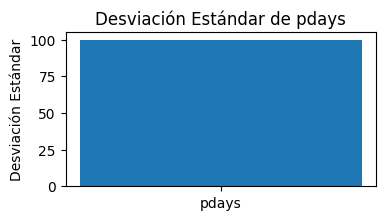

In [16]:
plt.figure(figsize=(4, 2))
plt.bar("pdays", destd_pdays)
plt.title("Desviación Estándar de pdays")
plt.ylabel("Desviación Estándar")
plt.show

In [17]:
media = df["dias_previos"].mean()
print("Promedio de días de contacto:", media)

Promedio de días de contacto: 40.17822461123277


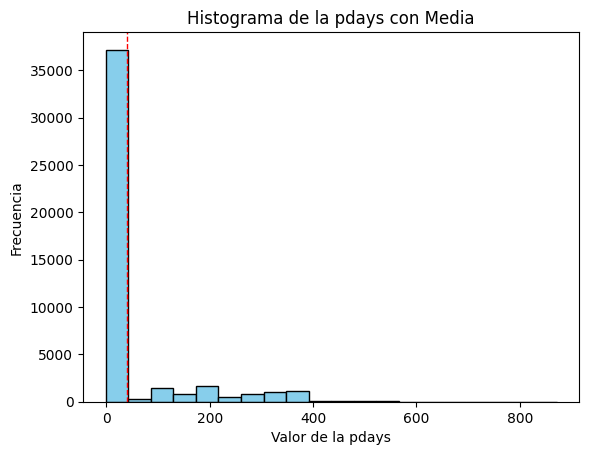

In [18]:
plt.hist(df["dias_previos"], bins=20, color="skyblue", edgecolor="black")

plt.axvline(media, color="red", linestyle="dashed", linewidth=1)

plt.xlabel("Valor de la pdays")
plt.ylabel("Frecuencia")
plt.title("Histograma de la pdays con Media")

plt.show()

In [19]:
print(f"Tamaño del set antes de eliminar las filas repetidas: {df.shape}")
df.drop_duplicates(inplace=True)

print(f"Tamaño del set después de eliminar las filas repetidas: {df.shape}")

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


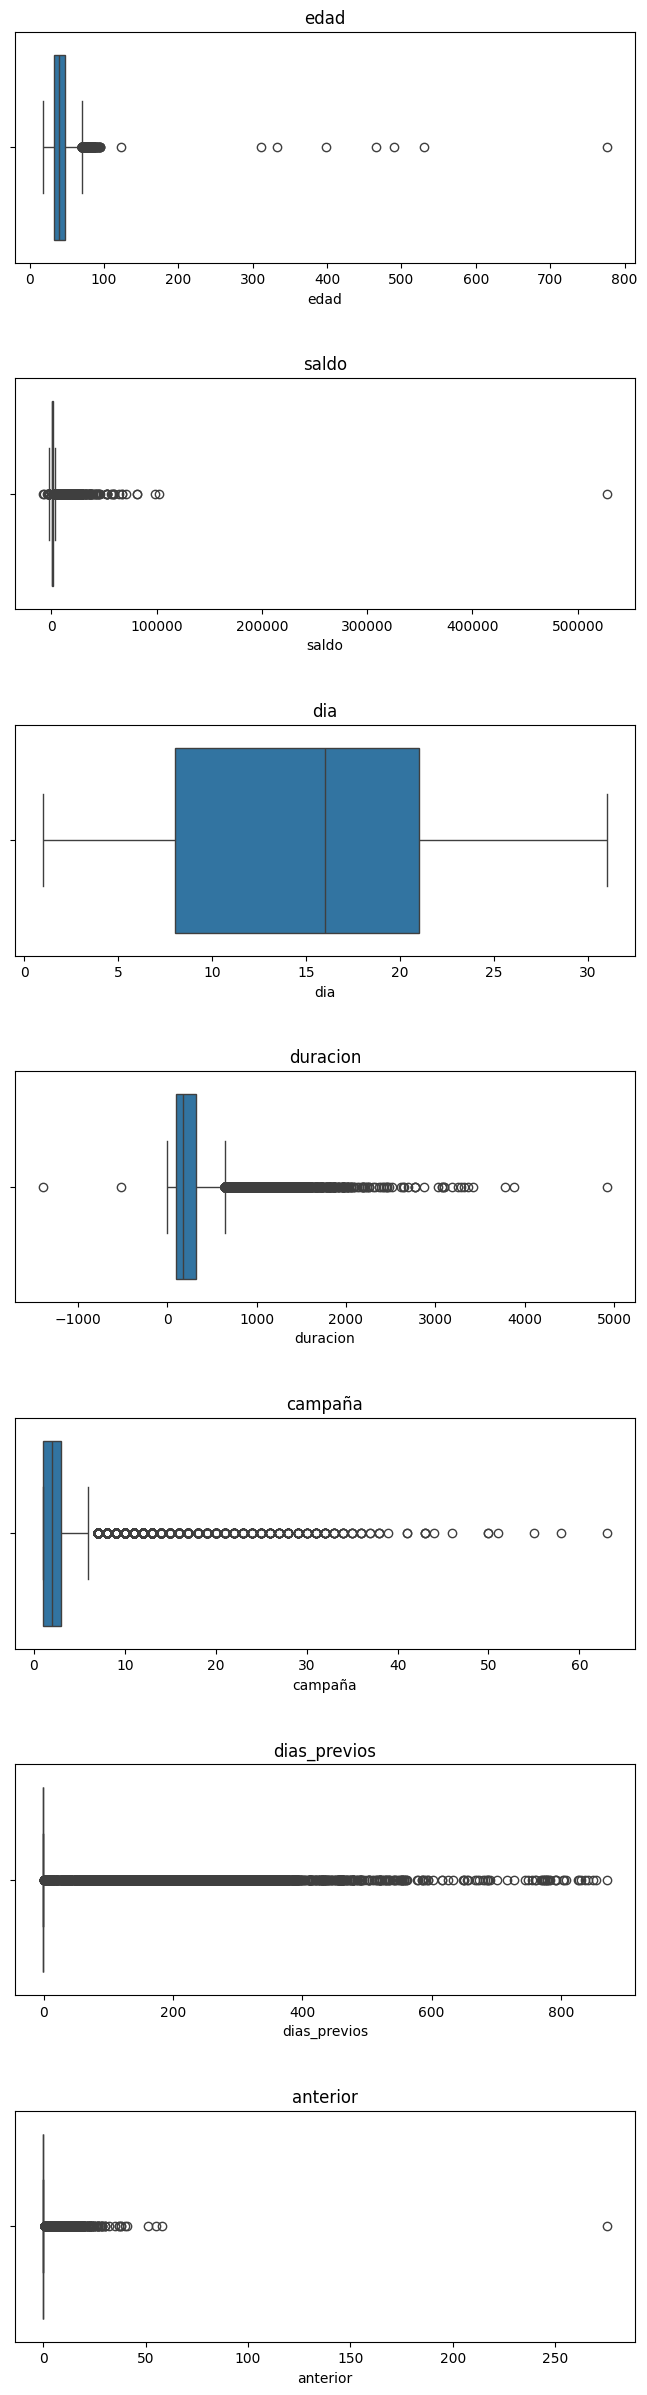

In [20]:
cols_num = ["edad", "saldo", "dia", "duracion", "campaña", "dias_previos", "anterior"]

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

In [21]:
print(f"Tamaño del set antes de eliminar registros de edad: {df.shape}")
df = df.drop(df[df["edad"] > 100].index)
print(f"Tamaño del set después de eliminar registros de edad: {df.shape}")

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [22]:
print(f"Tamaño del set antes de eliminar registros de duración: {df.shape}")
df = df.drop(df[df["duracion"] < 0].index)
print(f"Tamaño del set después de eliminar registros de duración: {df.shape}")

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45193, 17)


In [23]:
print(f"Tamaño del set antes de eliminar registros de edad: {df.shape}")
df = df.drop(df[df["anterior"] > 100].index)
print(f"Tamaño del set después de eliminar registros de edad: {df.shape}")

Tamaño del set antes de eliminar registros de edad: (45193, 17)
Tamaño del set después de eliminar registros de edad: (45192, 17)


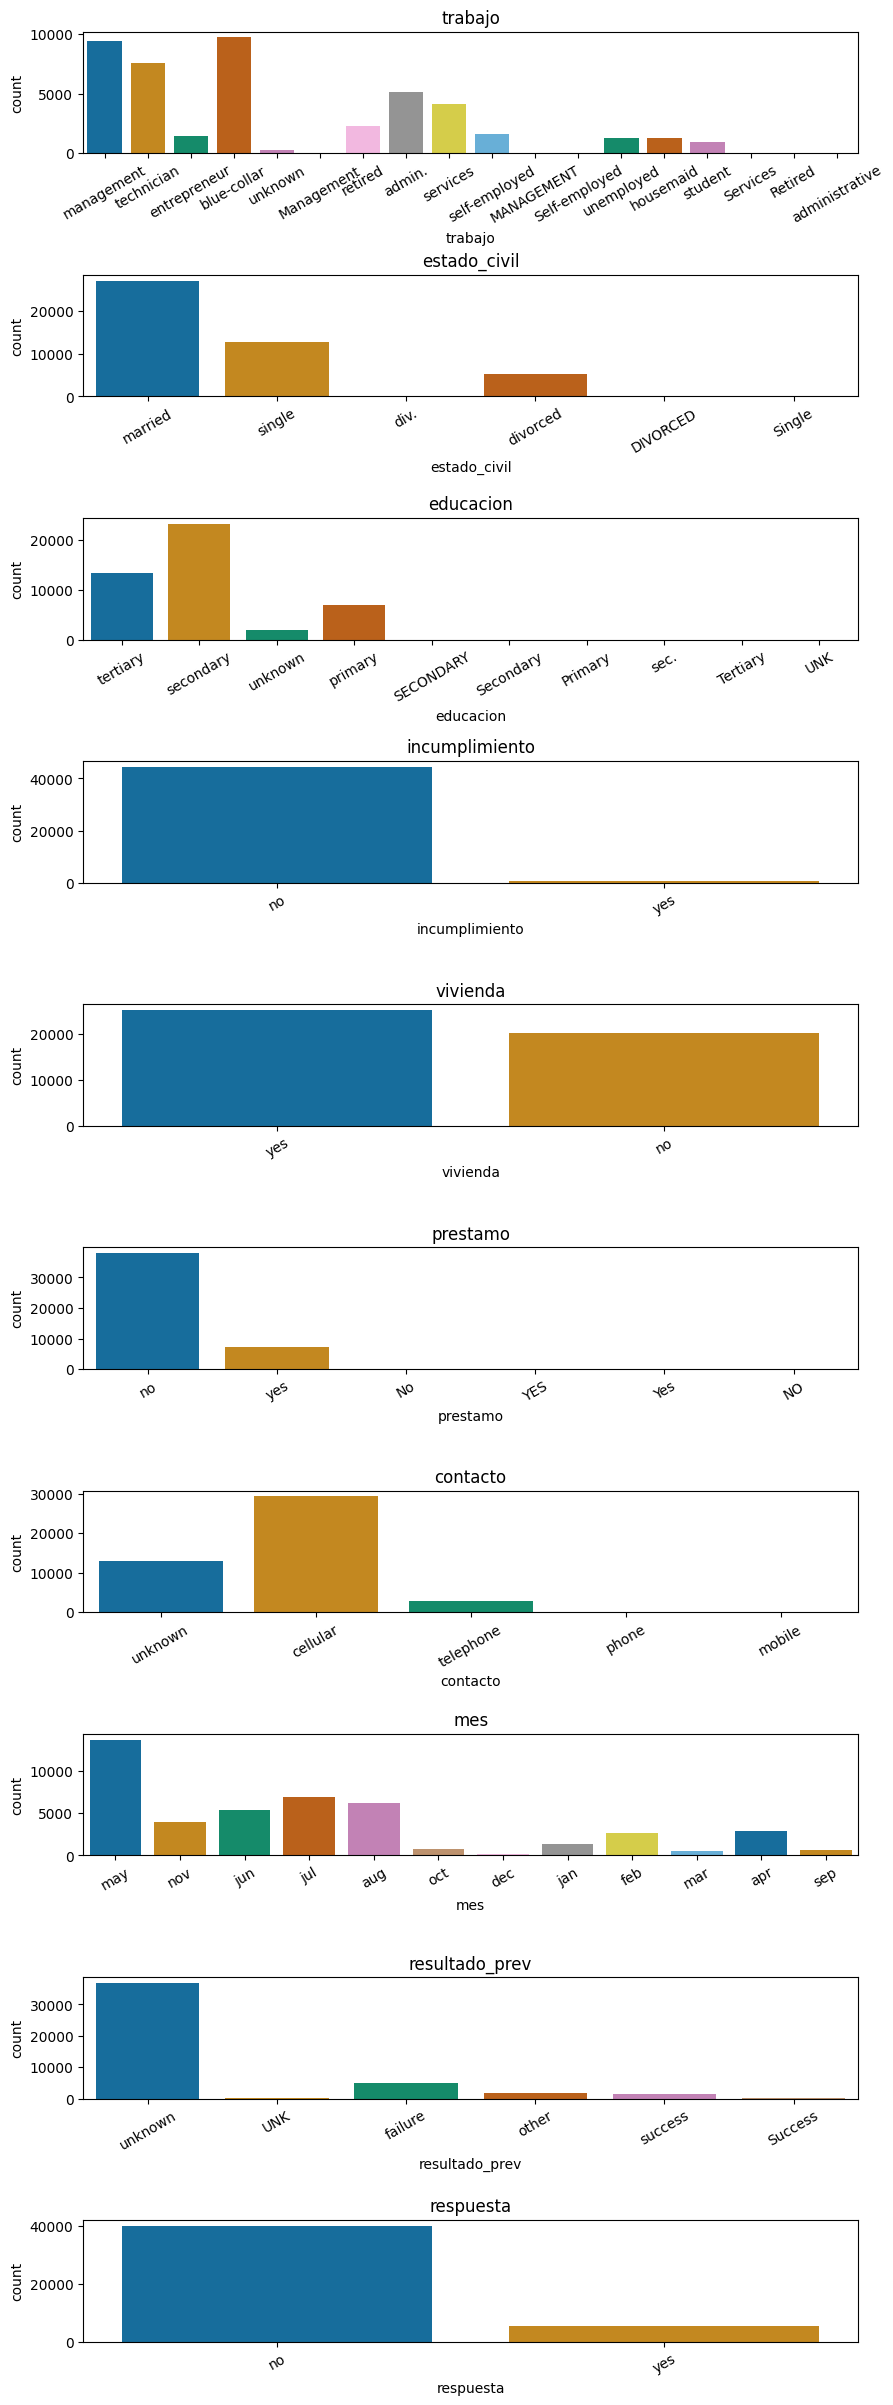

In [24]:
cols_cat = ["trabajo", "estado_civil", "educacion", "incumplimiento", "vivienda", "prestamo", "contacto", "mes", "resultado_prev", "respuesta"]

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, hue=col, data=df, ax=ax[i], palette="colorblind", legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis="x", labelrotation=30)

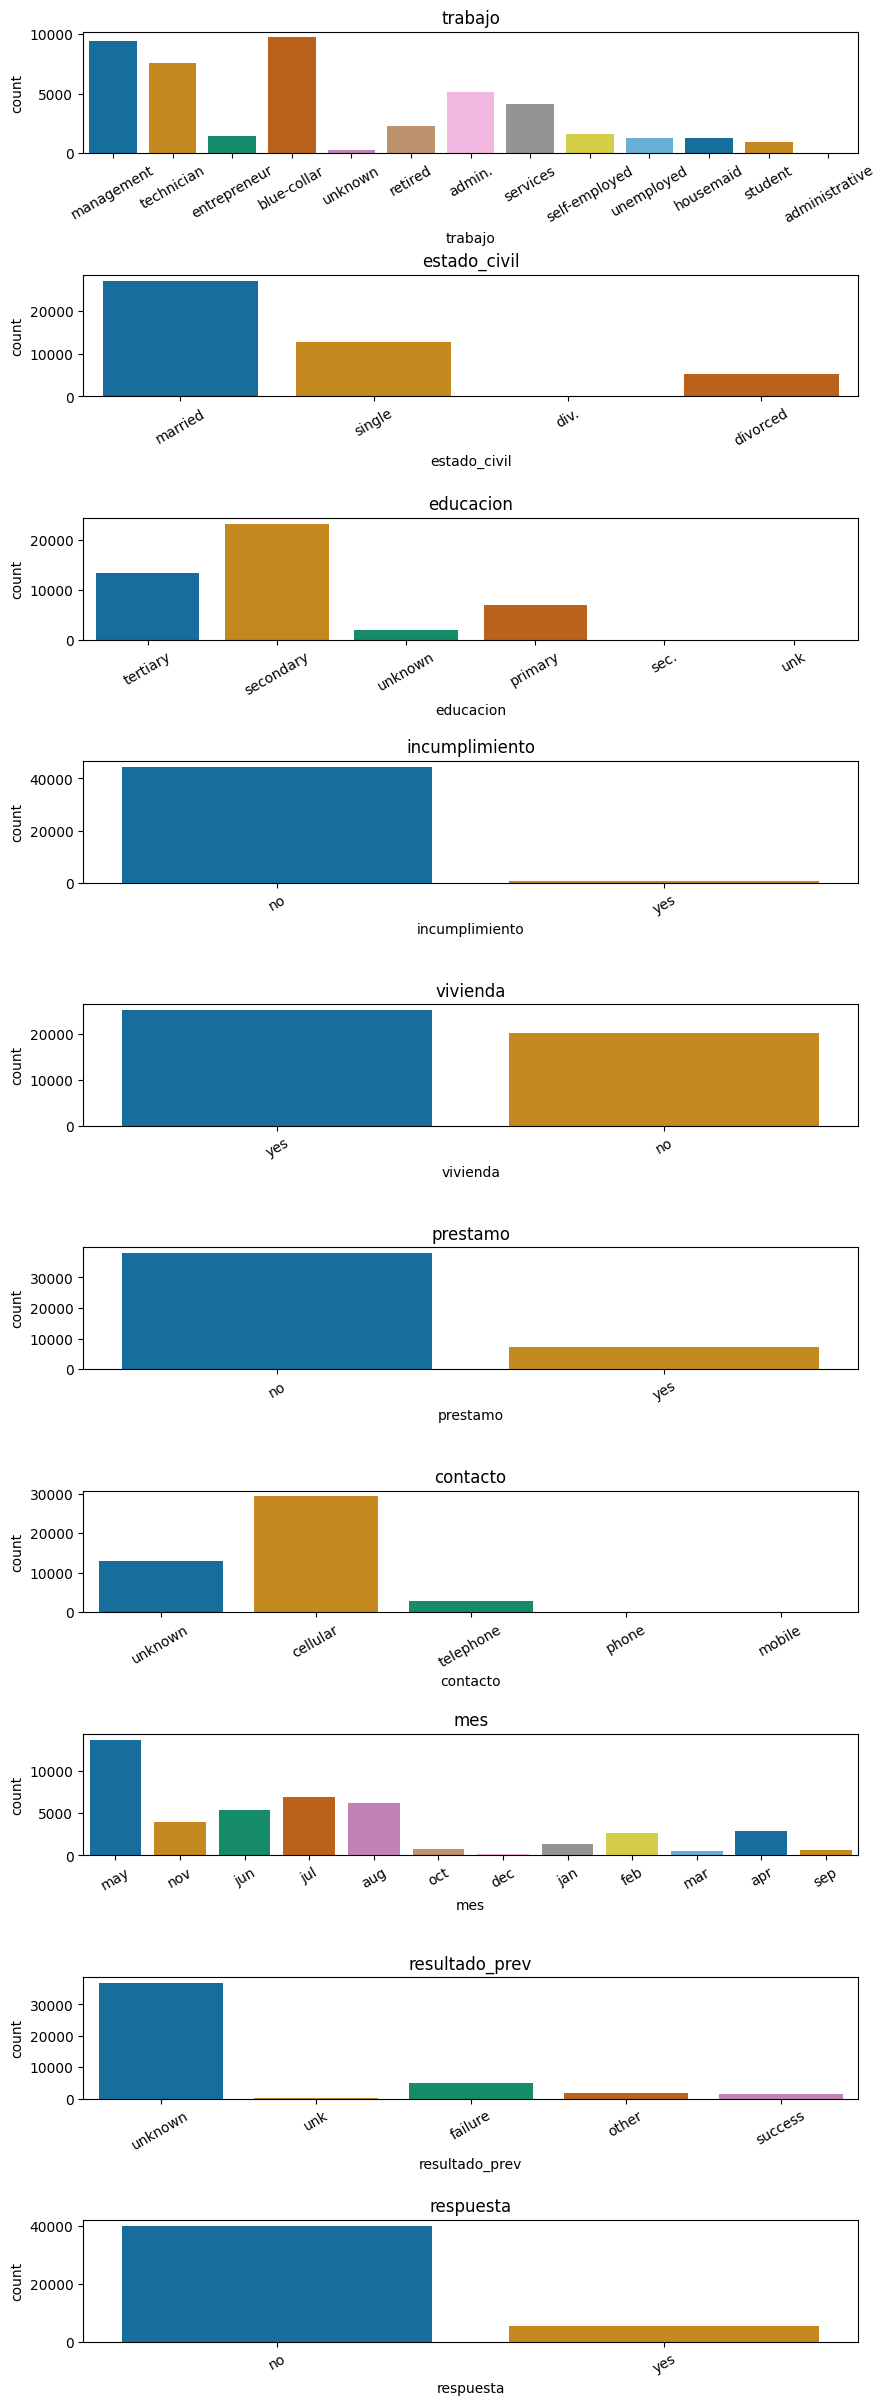

In [25]:
for column in df.columns:
    if column in cols_cat:
        df[column] = df[column].str.lower()

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)


for i, col in enumerate(cols_cat):
    sns.countplot(x=col, hue=col, data=df, ax=ax[i], palette="colorblind", legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis="x", labelrotation=30)

In [26]:
# job: unificar admin. y administrative

print(df["trabajo"].unique())
df["trabajo"] = df["trabajo"].str.replace("admin.", "administrative", regex=False)
print(df["trabajo"].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [27]:
# marital: unificar div. y divorced

print(df["estado_civil"].unique())
df["estado_civil"] = df["estado_civil"].str.replace("div.", "divorced", regex=False)
print(df["estado_civil"].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [28]:
# education: unificar sec. y secondary, unk y unknown
print(df["educacion"].unique())
df["educacion"] = df["educacion"].str.replace("sec.", "secondary", regex=False)
df.loc[df["educacion"]=="unk", "educacion"] = "unknown"
print(df["educacion"].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [29]:
# contacto: unificar phone y telephone, mobile y cellular

print(df["contacto"].unique())
df.loc[df["contacto"]=="phone", "contacto"] = "telephone"
df.loc[df["contacto"]=="mobile", "contacto"] ="cellular"
print(df["contacto"].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [30]:
# Resultado_prev: Unificar unk y unknown

print(df["resultado_prev"].unique())
df.loc[df["resultado_prev"]=="unk", "resultado_prev"] = "unknown"
print(df["resultado_prev"].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [31]:
# Edad (age) promedio (mean) de los clientes interesados en adquirir un certificado de depósito (y)

edad_promedio_interesados = df[df["respuesta"] == "yes"]["edad"].mean()
print("1. Edad promedio de los clientes interesados:", edad_promedio_interesados)

1. Edad promedio de los clientes interesados: 41.665468306527906


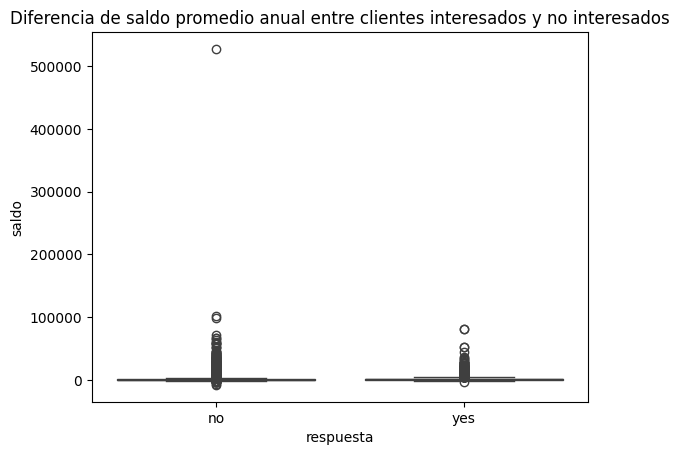

In [32]:
# Diferencia de ingresos entre clientes interesados y no interesados

sns.boxplot(x="respuesta", y="saldo", data=df)
plt.title("Diferencia de saldo promedio anual entre clientes interesados y no interesados")
plt.show()

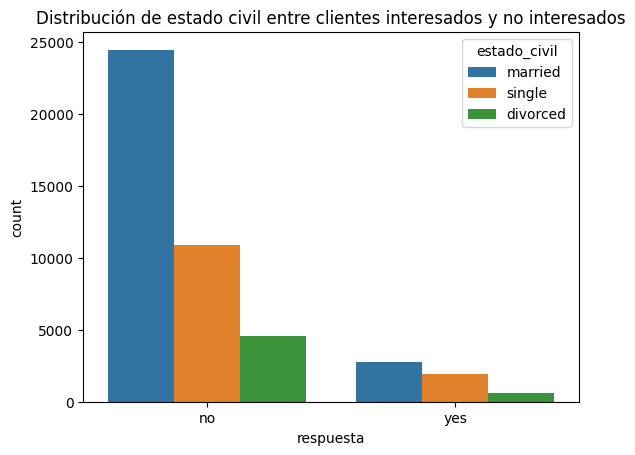

In [33]:
sns.countplot(x="respuesta", hue="estado_civil", data=df)
plt.title("Distribución de estado civil entre clientes interesados y no interesados")
plt.show()


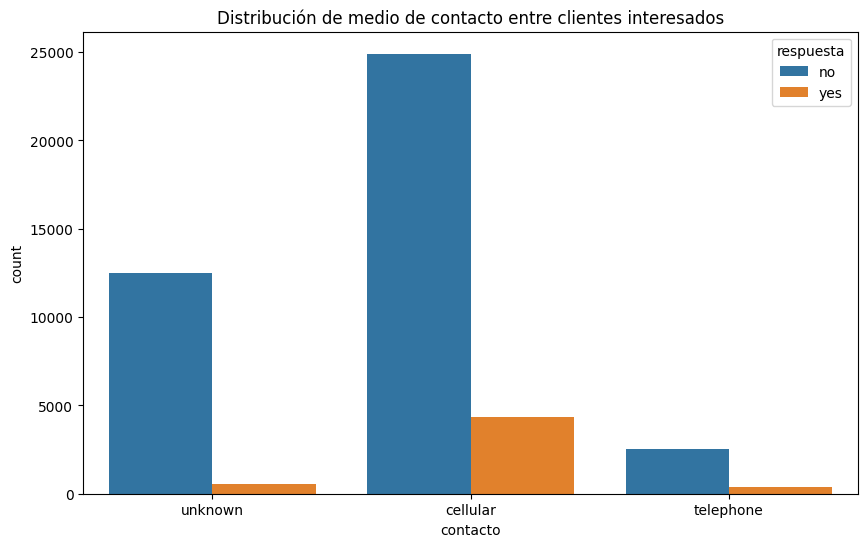

In [34]:
# Distribución medio de contacto de los clientes interesados

plt.figure(figsize=(10,6))
sns.countplot(x="contacto", hue="respuesta", data=df)
plt.title("Distribución de medio de contacto entre clientes interesados")
plt.show()

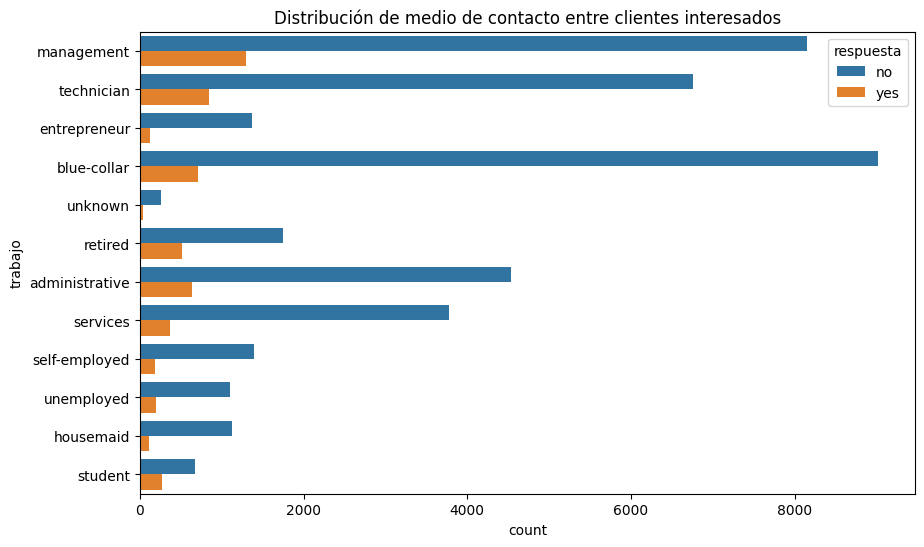

In [35]:
# Tipo de ocupación de los clientes interesados

plt.figure(figsize=(10,6))
sns.countplot(y="trabajo", hue="respuesta", data=df)
plt.title("Distribución de medio de contacto entre clientes interesados")
plt.show()

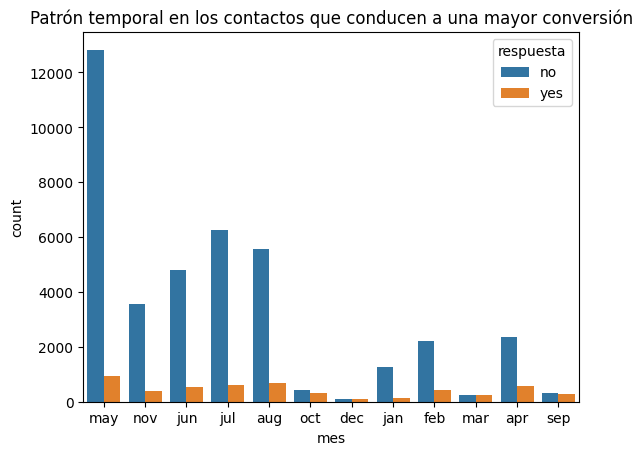

In [36]:
# Patrón temporal en los contactos que conducen a una mayor conversión de clientes

sns.countplot(x="mes", hue="respuesta", data=df)
plt.title("Patrón temporal en los contactos que conducen a una mayor conversión")
plt.show()

In [37]:
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006235e858bce35QU9aDOwFEi84VxW0" style="height: auto">\n    <hea…